<a href="https://colab.research.google.com/github/GlodnyFrodo/CreditScoring/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT, PROJECT GOAL AND SOURSE OF DATA**

**Problem Statement:**
You are working as a data scientist in a global finance company.
Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligentsystem to segregate the people into credit score brackets to reduce the manual efforts.

**Task:**
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

**Source:**
https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv


---



# **COLMUNS DESCRIPTION**


ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance:Represents the monthly balance amount of the customer

Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))



---




# **IMPORTED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from xgboost import XGBClassifier

# **DATA COLLECTION**

In [ ]:
train = pd.read_csv("drive/MyDrive/kaggle_data/train.csv", low_memory=False)

# **DATA PREVIEW**

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
train.shape

(16861, 28)

In [ ]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,14330.000000,16861.000000,16861.000000,16861.000000,16861.000000,16517.000000,16861.000000,16861.000000
mean,4302.357054,17.744914,23.616986,71.900065,21.178341,25.801356,32.296261,1390.955131
std,3220.323501,121.272573,134.040909,465.250341,14.707719,181.768004,5.138845,8205.903857
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1663.025833,3.000000,4.000000,7.000000,10.000000,3.000000,28.011655,30.201032
50%,3216.025833,6.000000,6.000000,14.000000,18.000000,5.000000,32.329492,70.479478
75%,6080.968958,8.000000,7.000000,20.000000,28.000000,9.000000,36.527949,168.131731
max,14855.930000,1789.000000,1486.000000,5747.000000,67.000000,2592.000000,50.000000,82256.000000


# **DATA CLEANING AND PREPARATION**

In [ ]:
train.duplicated().sum()

0

**COLUMN DATA TYPE ADJUSTMENT**

In [ ]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Num_of_Delayed_Payment'] = pd.to_numeric(train['Num_of_Delayed_Payment'], errors='coerce')

**CREDIT_HISTORY_AGE**

In [ ]:
credit_history_len = []
for value in train["Credit_History_Age"]:
    if value is np.nan:
        credit_history_len.append(np.nan)
    else:
        history_length_str = value.lower().split()
        try:
          history_length_num = float(history_length_str[0]) + float(history_length_str[3]) / 12
        except IndexError:
          print(value)

        credit_history_len.append(history_length_num)
train['Credit_History_Age'] = credit_history_len  # years in float
del credit_history_len, history_length_num, history_length_str


train['Credit_History_Age'].head()


0    22.083333
1          NaN
2    22.250000
3    22.333333
4    22.416667
Name: Credit_History_Age, dtype: float64

**DROPPING UNNECESERY COLUMNS**

In [ ]:
train = train.drop(columns=['ID', 'Name', 'SSN'])

**PAYMENT BEHAVIOUR COLUMN MAPPING**

In [ ]:
pay_beh_category_mapping = {
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}

train['Payment_Behaviour'] = train['Payment_Behaviour'].map(pay_beh_category_mapping)

del pay_beh_category_mapping

In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

train['Month'] = train['Month'].map(month_mapping)

del month_mapping

**OCCUPATION COLUMN MAPPING**



In [ ]:
occuaption_category = [
    'Scientist',
    'Teacher',
    'Engineer',
    'Entrepreneur',
    'Developer',
    'Lawyer',
    'Media_Manager',
    'Doctor',
    'Journalist',
    'Manager',
    'Accountant',
    'Musician',
    'Mechanic',
    'Writer',
    'Architect'
]

train['Occupation'] = train['Occupation'].fillna(pd.Series(np.random.choice(occuaption_category, len(train.index))))

**CLIENT INFO GROUPING - SAME FOR ALL OF THEIR BANK ACCOUNTS**

In [ ]:
col_names_to_transform = ['Age', 'Annual_Income', 'Occupation', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                          'Outstanding_Debt', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance',
                          'Num_Credit_Inquiries', 'Payment_Behaviour']
for col in col_names_to_transform:
    train[f'{col}'] = train.groupby('Customer_ID')[f'{col}'].transform(lambda x: x.mode()[0])

train.drop('Customer_ID',axis=1,inplace=True)

**FIXING VALUES OF AGE COLUMN**

In [ ]:
ages = []
for a in train['Age']:
    if a < 16 or a > 100:
        a = np.NAN
    ages.append(a)

train['Age'] = pd.Series(ages).fillna((pd.Series(ages).dropna()).mode()[0])
del ages


**FIXING ERROR VALUES FOR CREDIT MIX, PAYMENT BEHAVIOUR AND PAYMENT 0F MIN AMOUNT**




In [ ]:
train.loc[train.Credit_Mix == '_', 'Credit_Mix'] = np.nan
train.loc[train.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan
train.loc[train.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

**FILLING MISSING VALUES**

In [ ]:
col_names_to_transform = ['Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Annual_Income', 'Type_of_Loan']
for col in col_names_to_transform:
    train[f'{col}'] = train[f'{col}'].fillna(train[f'{col}'].dropna().mode()[0])

col_names_to_transform = ['Monthly_Inhand_Salary', 'Changed_Credit_Limit']
for col in col_names_to_transform:
    train[f'{col}'] = train[f'{col}'].fillna(train[f'{col}'].dropna().mean())

**CHECK FOR APPLIED CORRECTION**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16861 entries, 0 to 16860
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     16861 non-null  int64  
 1   Age                       16861 non-null  float64
 2   Occupation                16861 non-null  object 
 3   Annual_Income             16861 non-null  float64
 4   Monthly_Inhand_Salary     16861 non-null  float64
 5   Num_Bank_Accounts         16861 non-null  int64  
 6   Num_Credit_Card           16861 non-null  int64  
 7   Interest_Rate             16861 non-null  int64  
 8   Num_of_Loan               16861 non-null  float64
 9   Type_of_Loan              16861 non-null  object 
 10  Delay_from_due_date       16861 non-null  int64  
 11  Num_of_Delayed_Payment    16861 non-null  float64
 12  Changed_Credit_Limit      16861 non-null  float64
 13  Num_Credit_Inquiries      16861 non-null  float64
 14  Credit

**FIXING ERROR VALUES CONT.**

In [ ]:
train.loc[train.Num_Bank_Accounts < 0,'Changed_Credit_Limit'] = 0
train.loc[train.Num_of_Loan < 0,'Num_of_Loan'] = 0
train.loc[train.Delay_from_due_date < 0,'Delay_from_due_date'] = 0
train.loc[train.Num_of_Delayed_Payment < 0,'Num_of_Delayed_Payment'] = 0
train.loc[train.Changed_Credit_Limit < 0,'Changed_Credit_Limit'] = 0
train.loc[train.Num_of_Loan < 0,'Num_of_Loan'] = 0

train.drop(train[train.Num_Credit_Card > 50].index,inplace=True)
train.drop(train[train.Num_Bank_Accounts > 50].index,inplace=True)

In [ ]:
train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                1
dtype: int64

**COMPARISON OF NUMERIC FEATURES BY CREDIT SCORE**


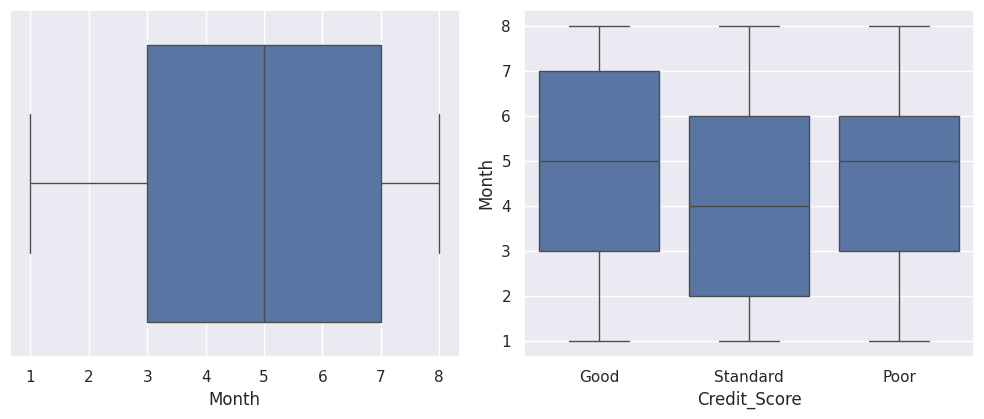

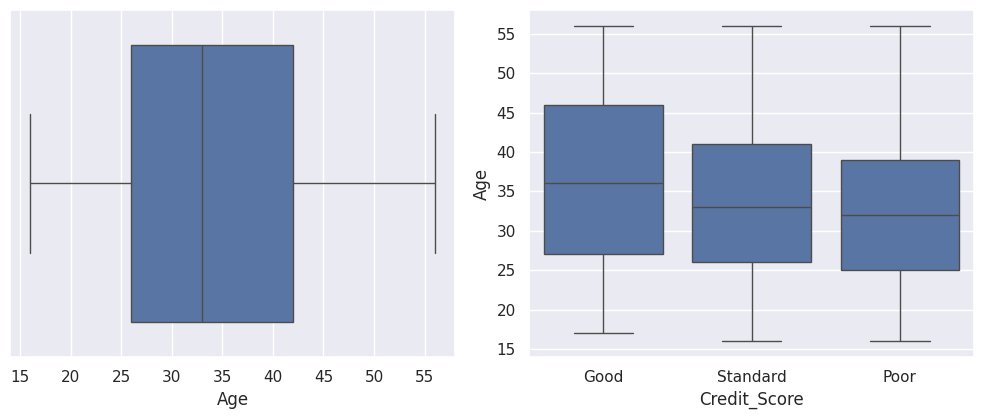

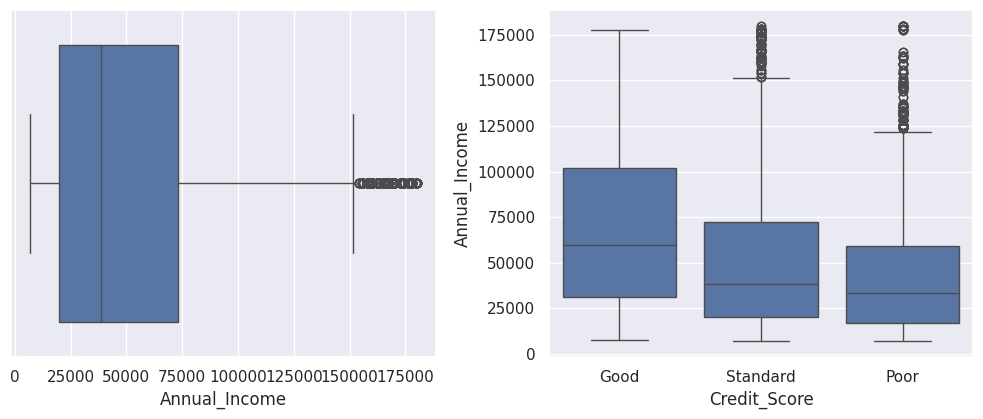

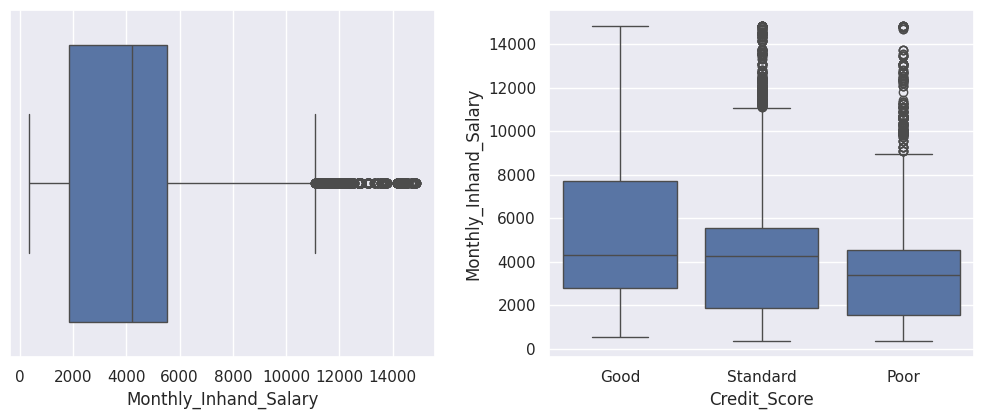

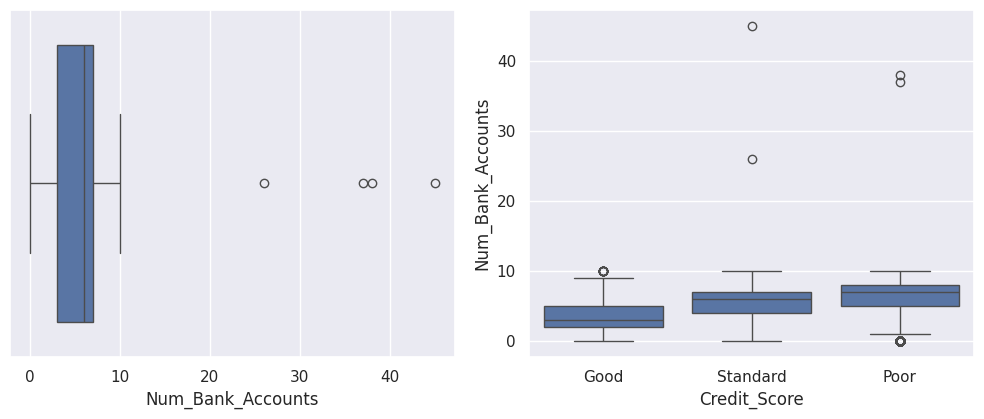

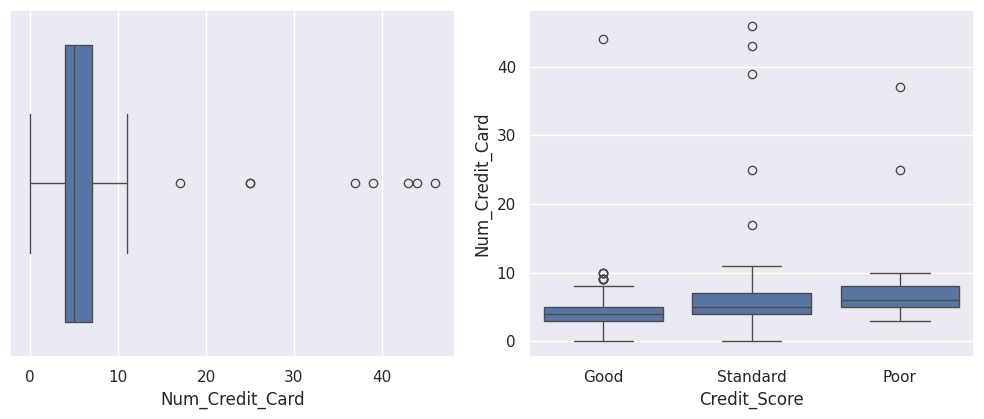

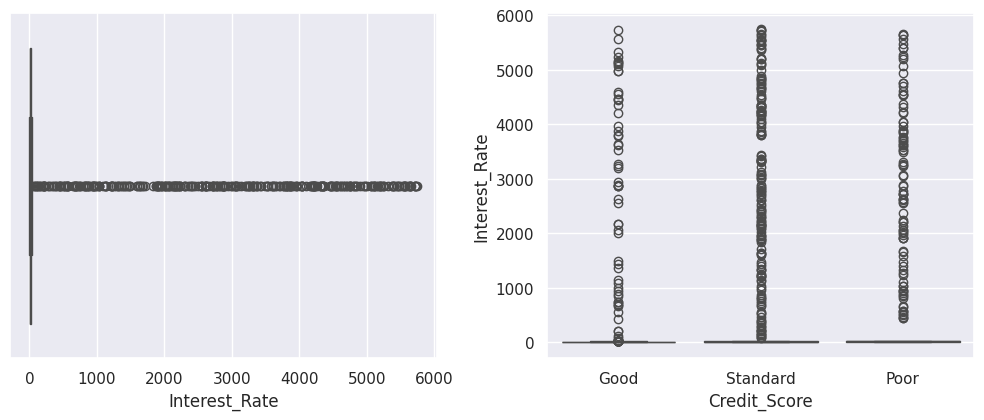

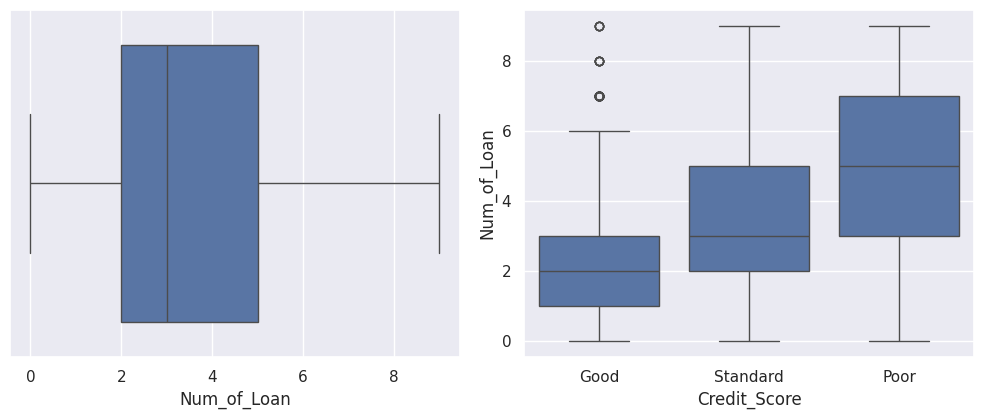

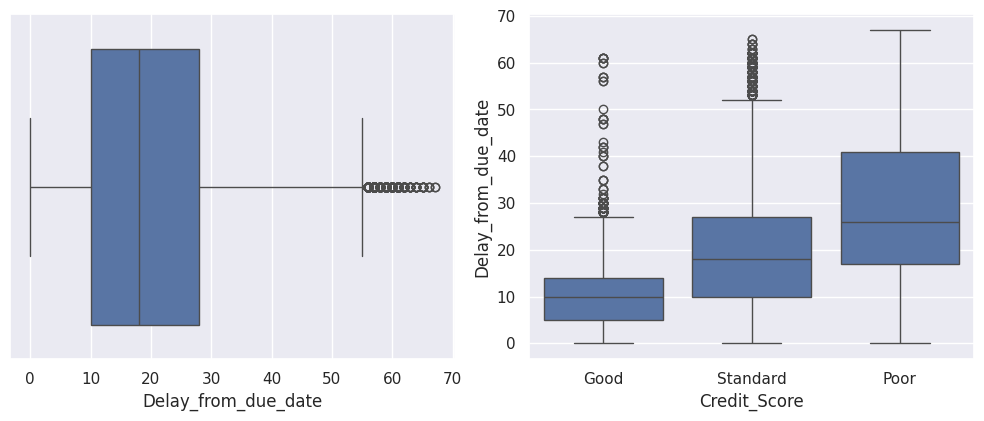

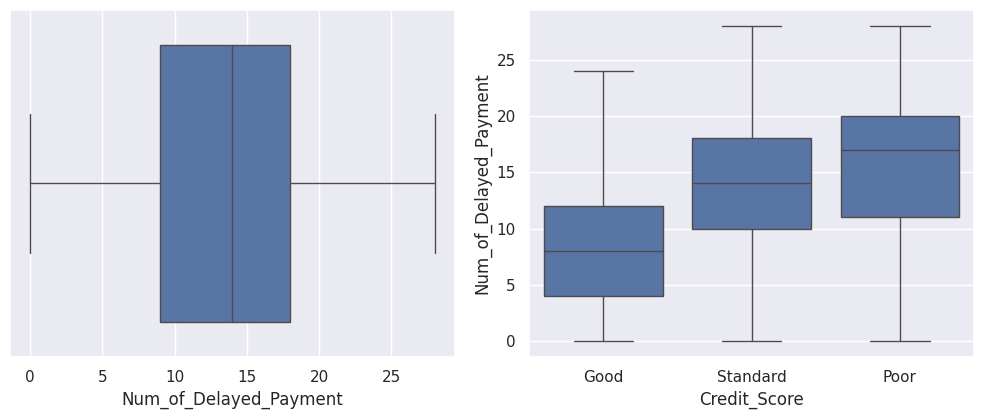

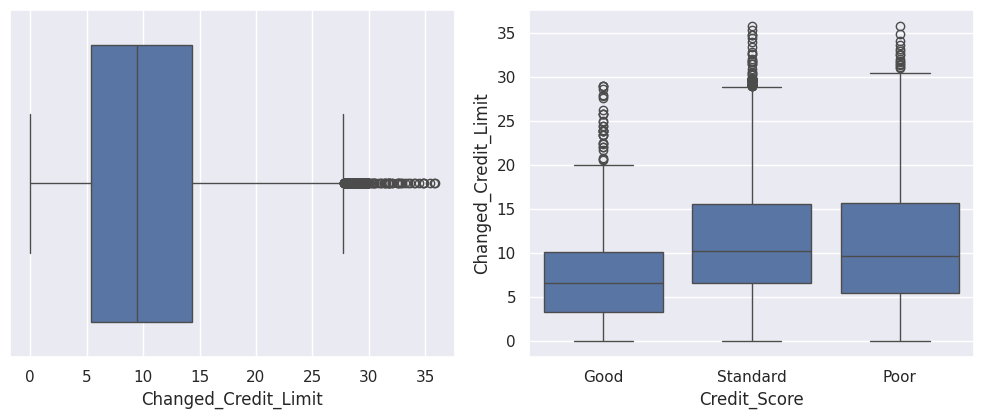

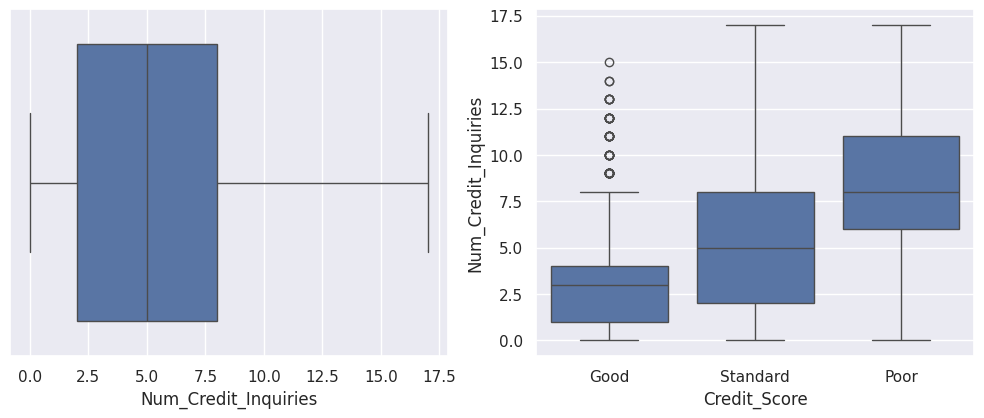

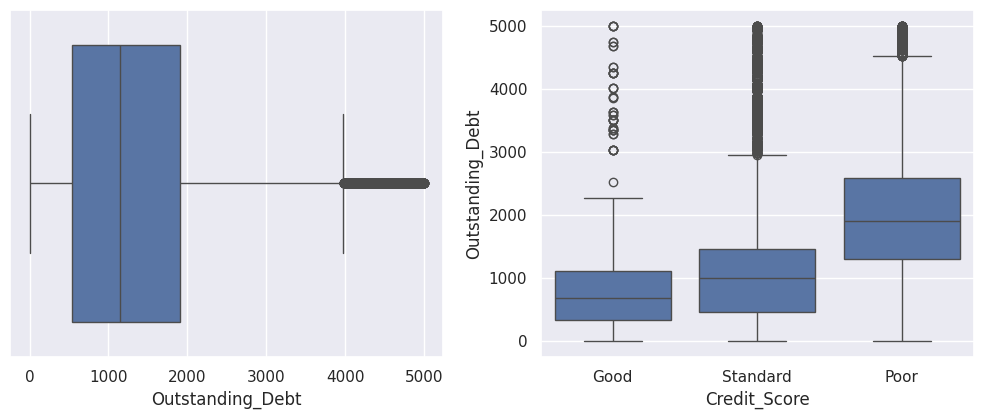

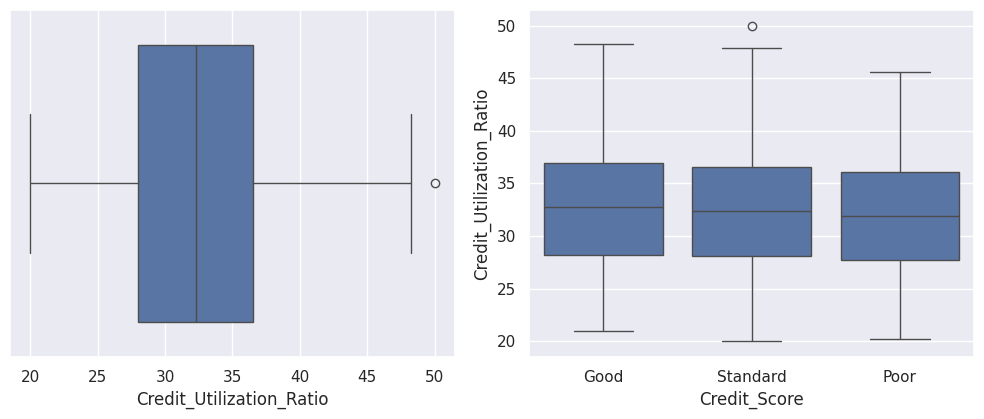

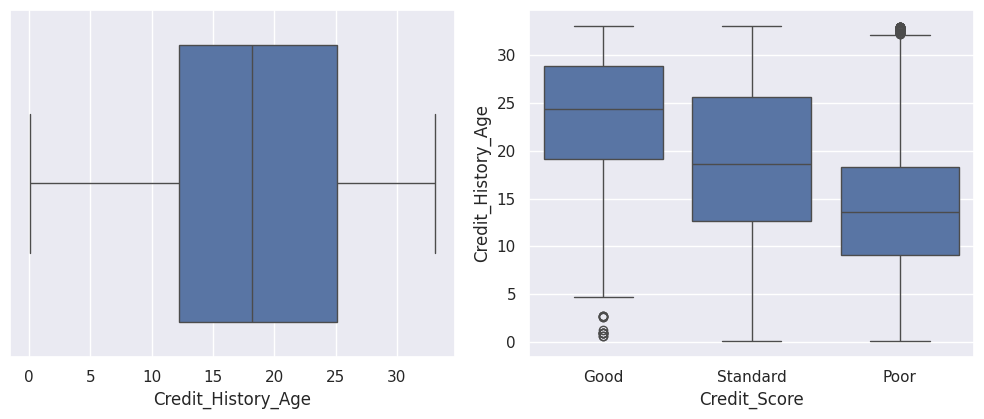

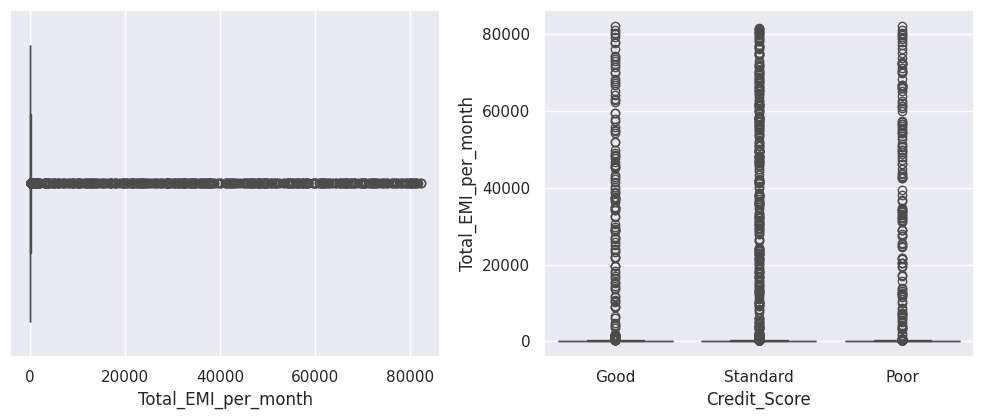

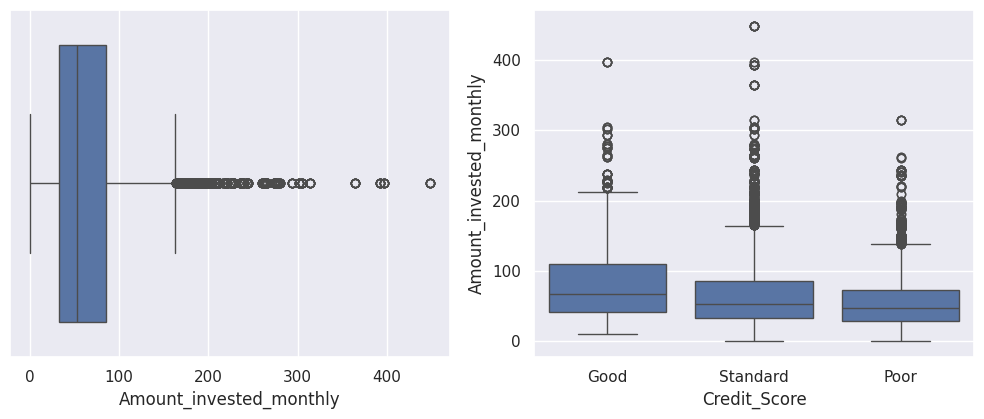

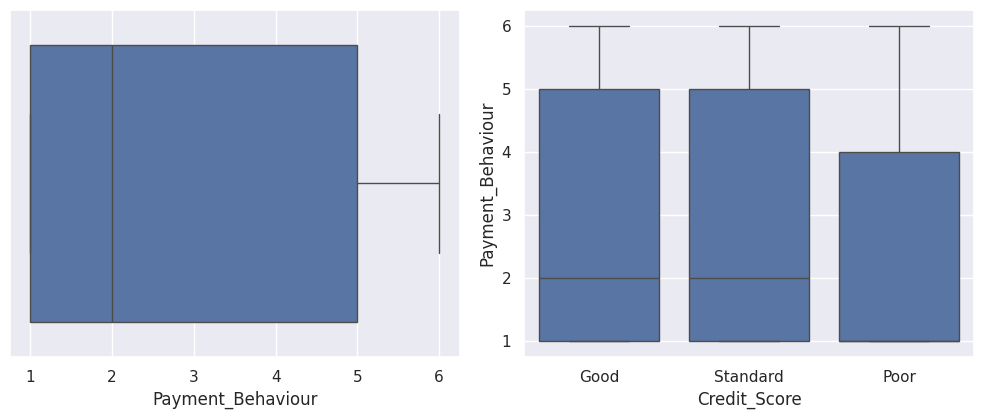

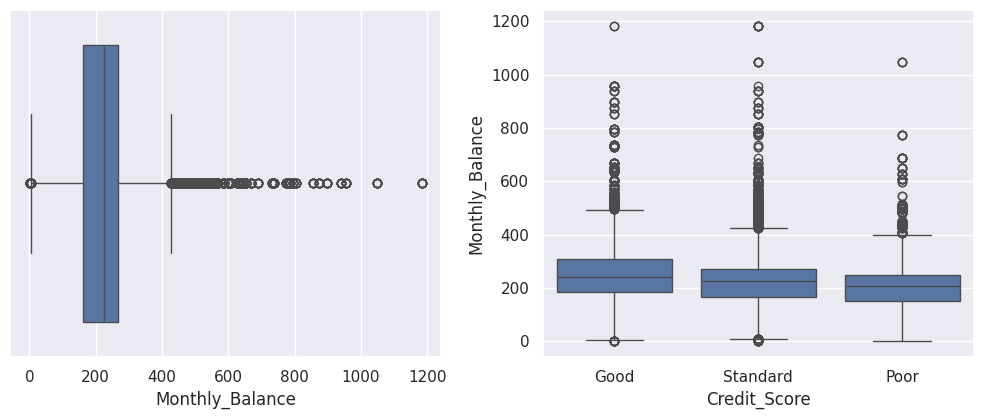

In [ ]:
sns.set()
for col in train.select_dtypes(include=np.number):
    plt.figure(figsize=(10,8))
    plt.subplot(2, 2, 1)

    sns.boxplot(x=col, data=train)
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Credit_Score', y=col, data=train)

    plt.tight_layout()

**COLUMN CORRELACTION HEATMAP**

<Axes: >

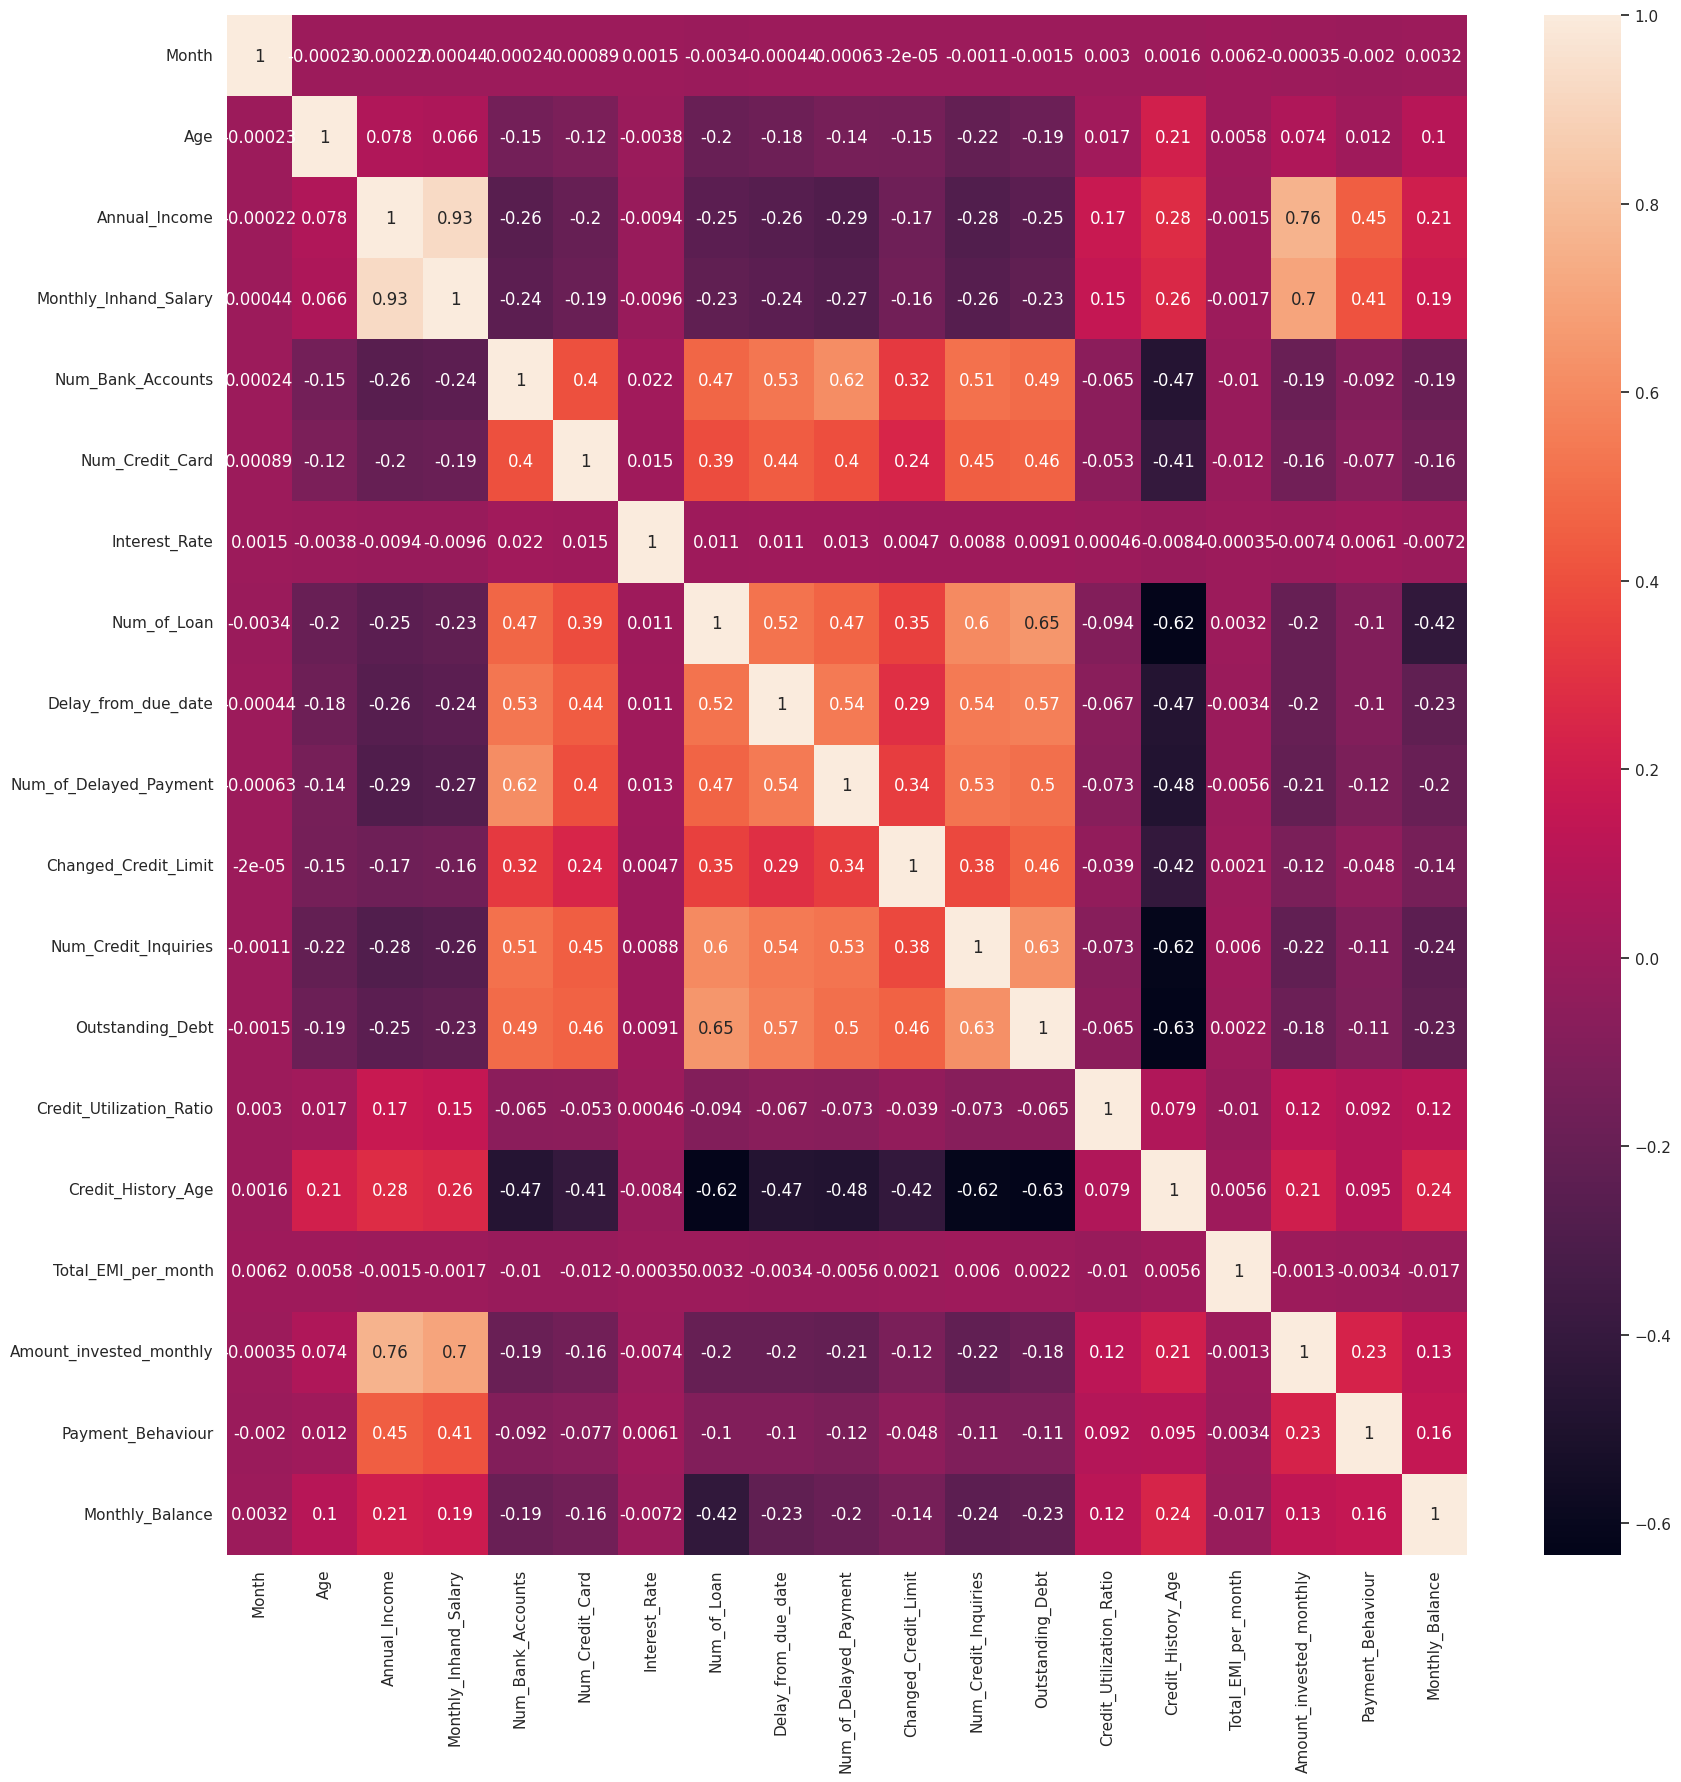

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True) # Amount_invested_monthly - 0.76

# **APPLYING STANDARDSCALER AND LABELENCODER FOR DATA TRANSFORMATION**

In [ ]:
train.select_dtypes(include=object).columns

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Credit_Score'],
      dtype='object')

In [ ]:
numeric = train.select_dtypes(include=np.number).columns
strings = train.select_dtypes(include=object).columns

train[numeric] = StandardScaler().fit_transform(train[numeric])

for col in strings:
    train[f'{col}'] = LabelEncoder().fit_transform(train[f'{col}'])


# **RANDOM FOREST MODEL**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16259 entries, 0 to 16860
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     16259 non-null  float64
 1   Age                       16259 non-null  float64
 2   Occupation                16259 non-null  int64  
 3   Annual_Income             16259 non-null  float64
 4   Monthly_Inhand_Salary     16259 non-null  float64
 5   Num_Bank_Accounts         16259 non-null  float64
 6   Num_Credit_Card           16259 non-null  float64
 7   Interest_Rate             16259 non-null  float64
 8   Num_of_Loan               16259 non-null  float64
 9   Type_of_Loan              16259 non-null  int64  
 10  Delay_from_due_date       16259 non-null  float64
 11  Num_of_Delayed_Payment    16259 non-null  float64
 12  Changed_Credit_Limit      16259 non-null  float64
 13  Num_Credit_Inquiries      16259 non-null  float64
 14  Credit_Mix 

In [ ]:
train.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.528363,-1.071918,12,-0.838908,-0.835440,-0.879664,-0.707679,-0.148974,0.186721,29,...,2,-0.513201,-1.063072,0.461025,0,-0.163806,-0.840662,-0.888079,-0.030396,0
1,-1.092083,-1.071918,12,-0.838908,-0.001591,-0.879664,-0.707679,-0.148974,0.186721,29,...,1,-0.513201,-0.066867,0.461025,0,-0.163806,-0.840662,-0.888079,-0.030396,0
2,-0.655802,-1.071918,12,-0.838908,-0.001591,-0.879664,-0.707679,-0.148974,0.186721,29,...,1,-0.513201,-0.715584,0.461025,0,-0.163806,-0.840662,-0.888079,-0.030396,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

RF = RandomForestClassifier(n_estimators=1000, random_state=42)

RF.fit(x_train, y_train)

RF.score(x_train,y_train)

1.0

In [ ]:
RF.score(x_test,y_test)

0.8296432964329643

In [ ]:
y_pred = RF.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       277
           1       0.80      0.87      0.83       484
           2       0.86      0.82      0.84       865

    accuracy                           0.83      1626
   macro avg       0.82      0.83      0.82      1626
weighted avg       0.83      0.83      0.83      1626



# **Extreme Gradient Boosting Classifier**

In [ ]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=1000, eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(x_train, y_train)
pred=xgb_classifier.predict(x_test)
xgb_acc_score = accuracy_score(y_test, pred)
xgb_acc_score

0.7995079950799509

In [ ]:
print(classification_report(y_test, pred))
# 0 - Good
# 1 - Standard
# 2 - Poor

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       277
           1       0.78      0.81      0.80       484
           2       0.82      0.80      0.81       865

    accuracy                           0.80      1626
   macro avg       0.79      0.79      0.79      1626
weighted avg       0.80      0.80      0.80      1626

